In [1]:
from LightGBM_BDT_train import * 

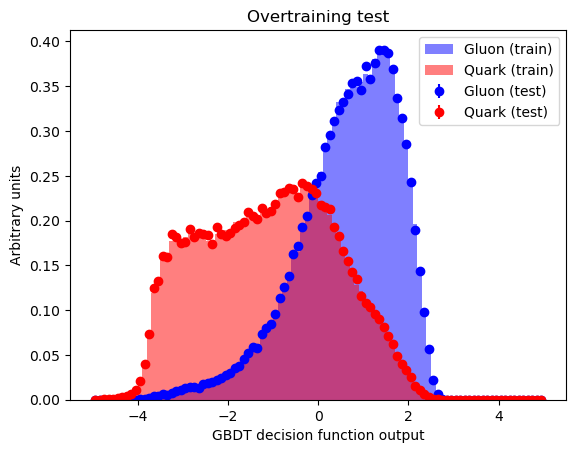

In [4]:
output_path = './tmp/'
sample_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/BDT_EB4/samples/sample_testweight_123'
training_vars = ['jet_pt', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1']
training_weights = ['flatpt_weight']

n_estimators = 100
learning_rate = 0.1
max_depth = 5

output_folder = Path(output_path)
if not output_folder.exists():
    output_folder.mkdir(parents=True, exist_ok=True)


main(output_path=output_path, sample_path=sample_path, 
    training_vars=training_vars, training_weights=training_weights,
    n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)


In [5]:
with open(f'{output_path}/clf.pkl', 'rb') as f:
    model = pickle.load(f)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

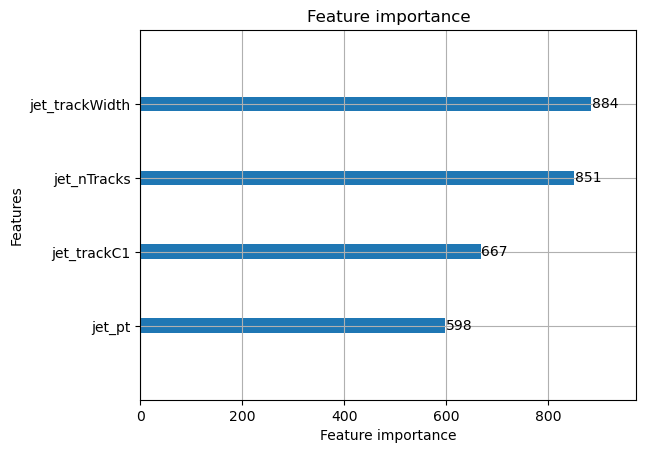

In [8]:
import lightgbm
lightgbm.plot_importance(model)

In [11]:
importance = model.feature_importances_ / np.sum(model.feature_importances_)

In [31]:
pd.DataFrame(importance[None,:], index = ["light gbm"], columns= training_vars)

,jet_pt,jet_nTracks,jet_trackWidth,jet_trackC1
light gbm,0.199333,0.283667,0.294667,0.222333


<AxesSubplot: >

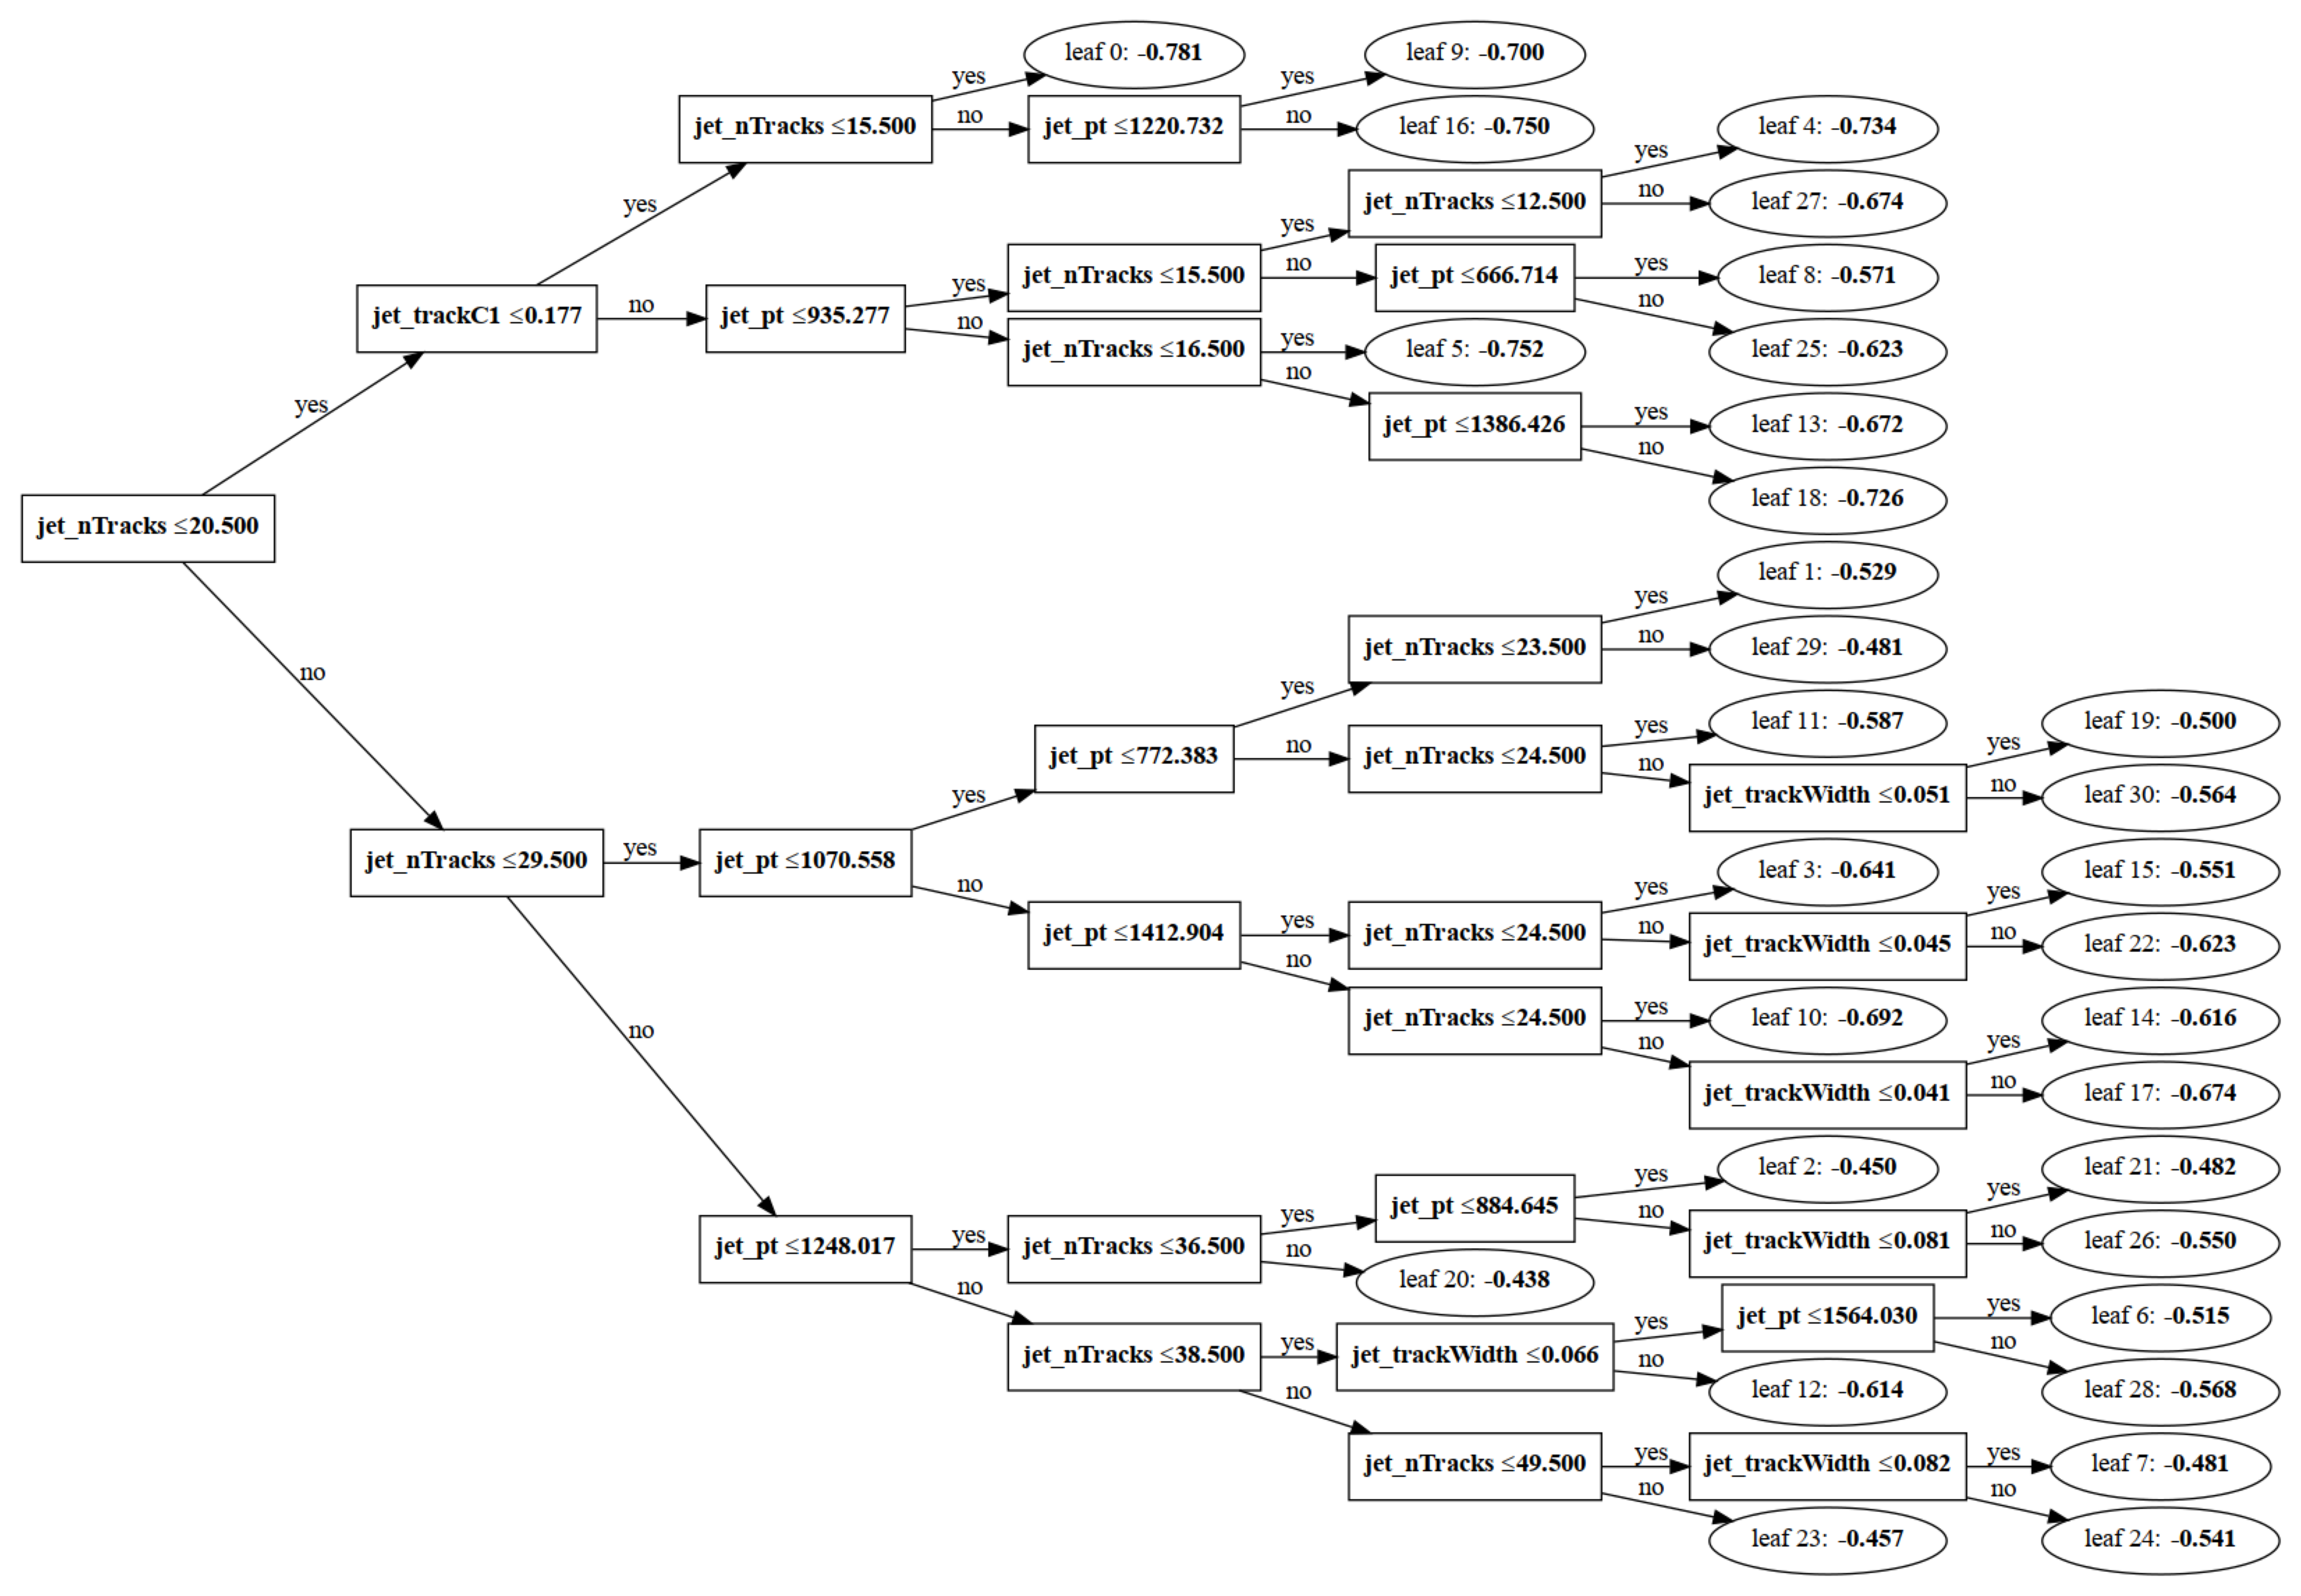

In [45]:
lightgbm.plot_tree(model, dpi=300, figsize=(20,50))

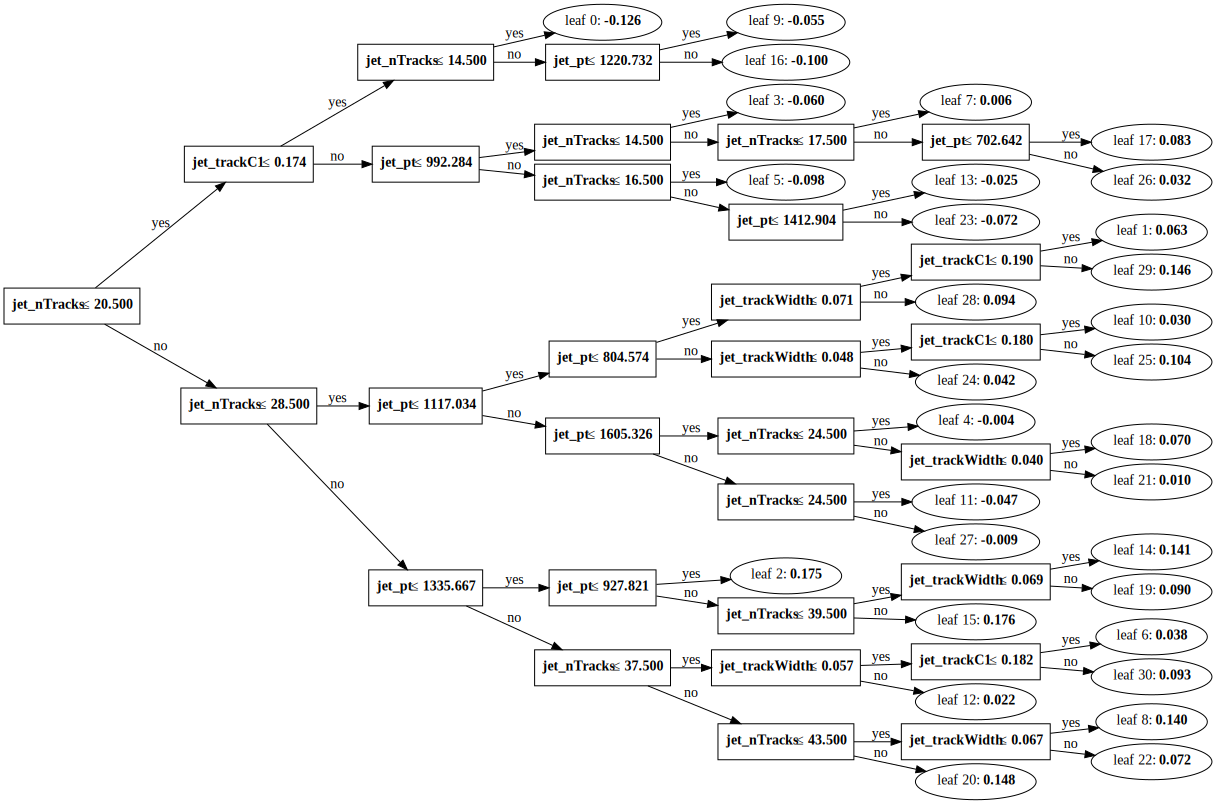

In [50]:
lightgbm.create_tree_digraph(model, tree_index=1)